In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv("dm2.csv")

# Preprocess the data
data = data.drop(["Data As Of", "Start Date", "End Date", "flag_accid", "flag_mva", "flag_suic", "flag_homic", "flag_drugod", "Accidents (Unintentional Injuries)", "Motor Vehicle Accidents", "Intentional Self-Harm (Suicide)", "Assault (Homicide)", "Drug Overdose", "Jurisdiction of Occurrence"], axis=1)
data["Date"] = pd.to_datetime(data["Year"].astype(str) + "-" + data["Month"].astype(str))
data.set_index("Date", inplace=True)
data.sort_index(inplace=True)

# Prepare the target variable
target = data['All Cause']
train_end = pd.to_datetime("2021-12-01")
test_end = pd.to_datetime("2022-12-01")

train_data = target[:train_end]
test_data = target[train_end:test_end]
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
y_pred = model_fit.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print("Root Mean Squared Error:", rmse)
forecast_start = pd.to_datetime("2023-01-01")
forecast_end = pd.to_datetime("2023-04-01")

forecast = model_fit.predict(start=forecast_start, end=forecast_end, dynamic=False)
print("Predicted 'All Cause' Deaths for 2023, months 1-4:")
print(forecast)




/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to 

Root Mean Squared Error: 261195.7068550425
Predicted 'All Cause' Deaths for 2023, months 1-4:
2023-01-01    658007.506485
2023-02-01    572093.201488
2023-03-01    564063.082330
2023-04-01    556529.717361
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
import itertools

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q, and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Grid search for the best parameters
min_rmse = float("inf")
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train_data, order=param, seasonal_order=param_seasonal)
            model_fit = model.fit(disp=False)
            y_pred = model_fit.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)
            rmse = np.sqrt(mean_squared_error(test_data, y_pred))
            if rmse < min_rmse:
                min_rmse = rmse
                best_params = param
                best_seasonal_params = param_seasonal
        except:
            continue

print("Best SARIMAX Parameters:", best_params, best_seasonal_params)


流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodel

Best SARIMAX Parameters: (1, 0, 2) (1, 1, 1, 12)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
best_model = SARIMAX(train_data, order=best_params, seasonal_order=best_seasonal_params)
best_model_fit = best_model.fit(disp=False)

# Calculate RMSE for the best model
y_pred = best_model_fit.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print("Root Mean Squared Error:", rmse)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to 

Root Mean Squared Error: 20757.88446365172


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = best_model_fit.predict(start=forecast_start, end=forecast_end, dynamic=False)
print("Predicted 'All Cause' Deaths for 2023, months 1-4:")
print(forecast)


Predicted 'All Cause' Deaths for 2023, months 1-4:
2023-01-01    322034.537684
2023-02-01    246518.410752
2023-03-01    238766.684926
2023-04-01    228096.296997
Freq: MS, Name: predicted_mean, dtype: float64


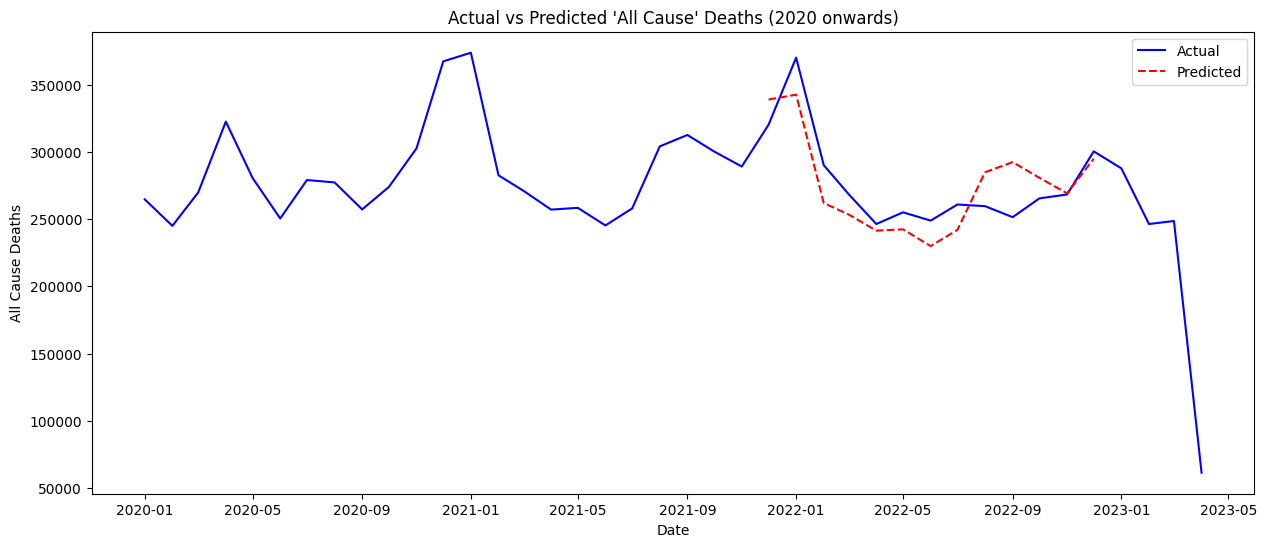

In [ ]:
# Create a DataFrame with the original data and the predicted values
comparison_data = pd.concat([target, y_pred], axis=1)
comparison_data.columns = ['Actual', 'Predicted']
comparison_data = comparison_data[pd.to_datetime("2020-01-01"):]

# Add the 2023 predictions to the comparison data
forecast_data = pd.DataFrame(forecast, columns=['Predicted'])
comparison_data = pd.concat([comparison_data, forecast_data])

# Plot the actual and predicted values
plt.figure(figsize=(15, 6))
plt.plot(comparison_data['Actual'], label='Actual', color='blue')
plt.plot(comparison_data['Predicted'], label='Predicted', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("All Cause Deaths")
plt.title("Actual vs Predicted 'All Cause' Deaths (2020 onwards)")
plt.legend()
plt.show()
